### Loading Taxi Data into Google Cloud SQL

### intro 
Cloud sql is fully managed sql server,postgres,or MySQL for your Relational DB (transictional RDMBS)

### configuration
**Activate Google Cloud Shell** <br>
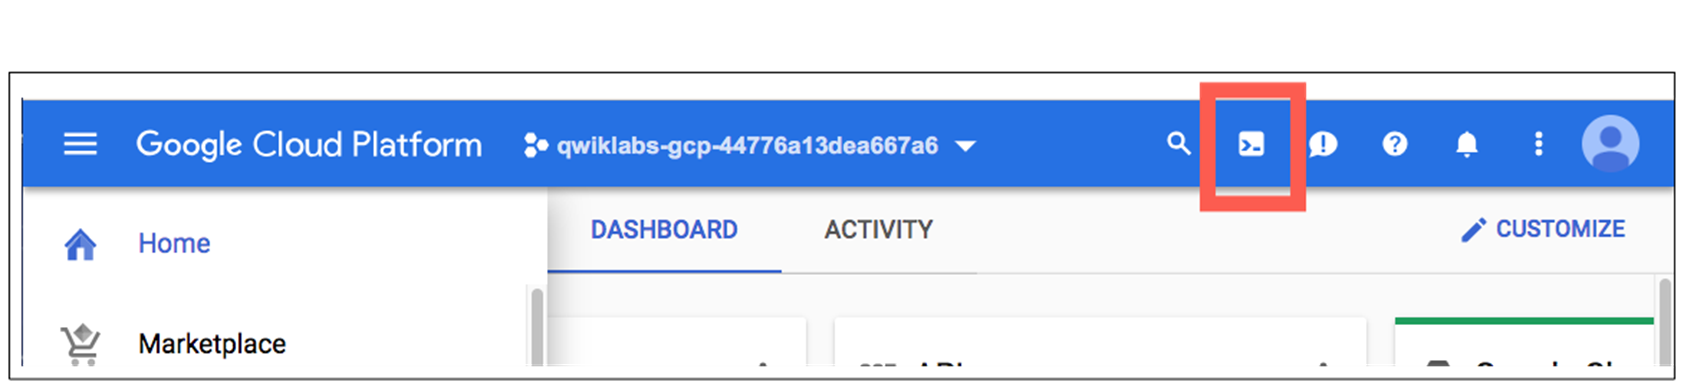
**Preparing your Environment** <br>
Create environment variables that will be used later in the lab for your project ID and the storage bucket that 
will contain your data: <br>
```shell
export PROJECT_ID=$(gcloud info --format='value(config.project)')
export BUCKET=${PROJECT_ID}-ml
```
**Create a Cloud SQL instance**
Enter the following commands to create a Cloud SQL instance: <br>
```shell
gcloud sql instances create taxi \
--tier=db-n1-standard-1 --activation-policy=ALWAYS
.Set a root password for the Cloud SQL instance:
gcloud sql users set-password root --host % --instance taxi \
--password Passw0rd
```
When prompted for the password type Passw0rd and press enter this will update root password.
Now create an environment variable with the IP address of the Cloud Shell: <br>
```shell
export ADDRESS=$(wget -qO - http://ipecho.net/plain)/32
```
a whitelist IP refers to a security mechanism used to control access to your Cloud SQL instance based on IP addresses. It is a list of approved or trusted IP addresses that are allowed to connect to your Cloud SQL instance, while all other IP addresses are denied access. <br>
Whitelist the Cloud Shell instance for management access to your SQL instance. <br>
```shell
gcloud sql instances patch taxi --authorized-networks $ADDRESS
```

Getting the IP address of your Cloud SQL instance by running: <br>
```shell
MYSQLIP=$(gcloud sql instances describe \
taxi --format="value(ipAddresses.ipAddress)")
```
Check the variable MYSQLIP: <br>
```shell
echo $MYSQLIP
```
you should get an IP address as an output. <br>
Create the taxi trips table by logging into the mysql command line interface <br>
```shell
mysql --host=$MYSQLIP --user=root \
--password --verbose
```

### Create schema
When prompted for a password enter Passw0rd. Paste the following content into the command line to create the 
schema for the trips table:

In [ ]:
create database if not exists bts;
use bts;
drop table if exists trips;
create table trips (
vendor_id VARCHAR(16),
pickup_datetime DATETIME,
dropoff_datetime DATETIME,
passenger_count INT,
trip_distance FLOAT,
rate_code VARCHAR(16),
store_and_fwd_flag VARCHAR(16),
payment_type VARCHAR(16),
fare_amount FLOAT,
extra FLOAT,
mta_tax FLOAT,
tip_amount FLOAT,
tolls_amount FLOAT,
imp_surcharge FLOAT,
total_amount FLOAT,
pickup_location_id VARCHAR(16),
dropoff_location_id VARCHAR(16)
); 

### Add data to Cloud SQL instance

Now you'll copy the New York City taxi trips CSV files stored on Cloud Storage locally. To keep resource usage 
low, you'll only be working with a subset of the data (~20,000 rows).
Run the following in the command line: <br>
```shell
gsutil cp gs://cloud-training/OCBL013/nyc_tlc_yellow_trips_2018_subset_1.csv trips.csv-1
gsutil cp gs://cloud-training/OCBL013/nyc_tlc_yellow_trips_2018_subset_2.csv trips.csv-2
```
Import the CSV file data into Cloud SQL using mysql: <br>
```shell
mysqlimport --local --host=$MYSQLIP --user=root --password \
--ignore-lines=1 --fields-terminated-by=',' bts trips.csv-*
```
When prompted for a password enter Passw0rd.
Connect to the mysql interactive console:
```shell
mysql --host=$MYSQLIP --user=root --password
```
When prompted for a password enter Passw0rd.

In [ ]:
select
max(trip_distance),
min(trip_distance)
from
trips;
• select count(*) from trips where trip_distance = 0;
• select count(*) from trips where fare_amount < 0;
• select
payment_type,
count(*)
from
trips
group by
payment_type;

exit; -- to exit mysql